**Lesson_4_2
. Тестування статистичних гіпотез. Гіпотези про нормальність.

https://towardsdatascience.com/normality-tests-in-python-31e04aa4f411

https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/

https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/





In [33]:

#Завантажити Pandas та інше

import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import scipy.stats
from scipy import stats
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import chi2_contingency



In [2]:
# Приклад 1. Дані вводимо вручну.
proba=pd.Series([10,20,38,40,45,50,52,65,77,100])
proba

0     10
1     20
2     38
3     40
4     45
5     50
6     52
7     65
8     77
9    100
dtype: int64

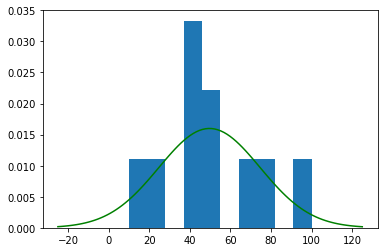

In [4]:
# будуємо на одному графіку гістограму і щільність теоретичного нормального розподілу
a, sigma  =scipy.stats.distributions.norm.fit(proba)
ix = np.linspace(-25,125,100)
N_fitted_proba = scipy.stats.distributions.norm.pdf(ix, a, sigma)
plt.hist(proba, density=True)
plt.plot(ix,N_fitted_proba,'g')

Застосуємо ще один засіб візуалізацію відповідності вибірки нормальному розподілу: Q-Q


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


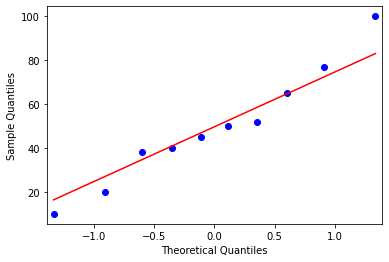

In [40]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
qqplot(proba, line='s')
pyplot.show()



З гістограми та цього графіку робимо припущення про відповідність даних вибірки нормальному розподілу.

    H0: the sample has a Gaussian distribution.
    H1: the sample does not have a Gaussian distribution.


Shapiro-Wilk Test. У якості статистики тесту обирається W=... .
Критерій полягає у наступному... .

In [15]:
# code for Shapiro-Wilk Test
from scipy.stats import shapiro
stat, p = shapiro(proba)
print('stat W=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
	print('The null hypothesis can be rejected. Probably not Gaussian')
else:
	print('The null hypothesis cannot be rejected. Not enough evidence to say data is not normal. Probably Gaussian')



stat W=0.973, p=0.920
The null hypothesis cannot be rejected. Probably Gaussian


D’Agostino’s K^2  Test. У якості статистики обирається =... .


In [18]:
# code for К'Test 
k2, p = scipy.stats.normaltest(proba)
alpha = 0.05
print('stat K_2=%.3f, p=%.3f' % (k2, p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
     print("The null hypothesis can be rejected. Probably not Gaussian")
else:
     print("The null hypothesis cannot be rejected. Probably Gaussian")

stat Xi_2=0.691, p=0.708
The null hypothesis cannot be rejected. Probably Gaussian


/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


Далі застосуємо Тест Пірсона Хі-квадрат. Статистика... .

Спочатку застосуємо цей тест без використання статистичних вбудованих функцій. Для йього побудуємо табл. для порівняння теоретичних і емпіричних частот як у файлі 4_2.

Тепер застосуємо вбудований тест Пірсона Хі квадрат.

In [41]:
#chisquare Pearson Test
from scipy.stats import chisquare
Statistics_Xi_2, p=chisquare(proba)
alpha = 0.05
print('stat Xi_2=%.3f, p=%.3f' % (Statistics_Xi_2, p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
     print("The null hypothesis can be rejected. Probably not Gaussian")
else:
     print("The null hypothesis cannot be rejected. Probably Gaussian")

stat Xi_2=125.274, p=0.000
The null hypothesis can be rejected. Probably not Gaussian


Приклад 2. У якості вибірки візьмемо згенеровані випадкові числа.

In [30]:
data_new = np.random.normal(0, 0.5, 1000)
data=pd.Series(data_new)

In [31]:
data.head()

0    0.009327
1    0.332778
2   -0.756103
3   -0.123084
4   -0.247340
dtype: float64

In [32]:
mean, var  =scipy.stats.distributions.norm.fit(data)

In [ ]:
mean, var

(0.0005278720195976963, 0.4963438057891533)

In [ ]:
x = np.linspace(-5,5,100)

In [ ]:
fitted_data = scipy.stats.distributions.norm.pdf(x, mean, var)

(array([0.00311329, 0.04358607, 0.12141834, 0.37359489, 0.69737712,
        0.76898281, 0.5697322 , 0.37982147, 0.11207847, 0.04358607]),
 array([-1.72402755, -1.40282401, -1.08162047, -0.76041693, -0.43921339,
        -0.11800985,  0.20319369,  0.52439723,  0.84560077,  1.16680431,
         1.48800785]),
 <a list of 10 Patch objects>)

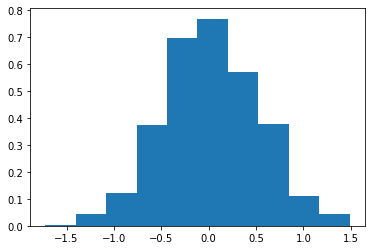

In [ ]:
plt.hist(data, density=True)

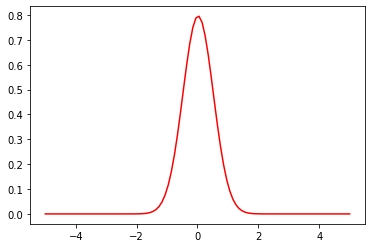

In [ ]:
plt.plot(x,fitted_data,'r-')

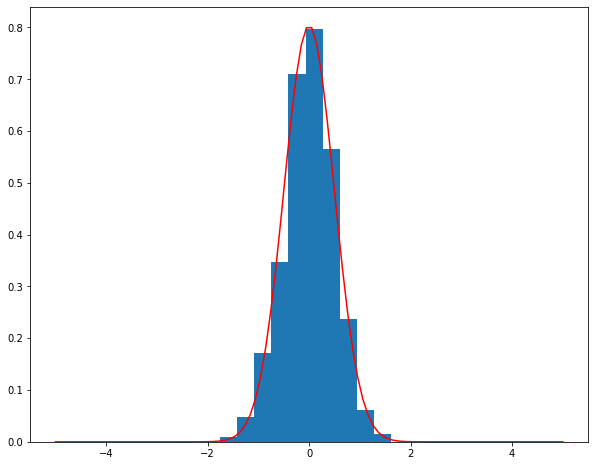

In [ ]:
plt.subplots(figsize=(10,8))
plt.hist(data, density=True)
plt.plot(x,fitted_data,'r-')